# Machine Learning Analysis

- Gabriel Wendell Celestino Rocha
- Leonardo Andrade de Almeida

---

## 0. Setup

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec
from matplotlib.font_manager import FontProperties

# CML Models
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import seaborn as sns
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# NN Models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import warnings
warnings.filterwarnings('ignore')

- ### Aesthetic Functions

In [2]:
%matplotlib inline

cm_font = FontProperties(fname  = 'CutiveMono-Regular.ttf')
gs_font = FontProperties(fname  = 'GillSans-Light.otf')
cm_size = 20


###############
# SINGLE PLOT #
###############
def sm_plot(grid = True, dark_background = False, use_tex = False, font_family = 'monospace', font_size = 15, 
            minorticks = True, major_ticks = True, minor_ticks = True, grid_linestyle = ':', grid_color = '0.50', 
            tick_length_minor = 5, tick_width_minor = 1, tick_length_major = 8, tick_width_major = 1, labelsize = 15):
    """
    Function to improve the aesthetics of Matplotlib graphs.
    """
    if dark_background:
        plt.style.use('dark_background')
    
    if grid:
        plt.grid(True, linestyle = grid_linestyle, color = grid_color, zorder = 0)
    else:
        plt.grid(False)
    
    plt.rcParams['text.usetex'] = use_tex
    plt.rcParams['font.family'] = font_family
    plt.rcParams['font.size'] = font_size
    
    if minorticks:
        plt.minorticks_on()
    else:
        plt.minorticks_off()
    
    if minor_ticks:
        plt.tick_params(axis = 'both', which = 'minor', direction = "in", 
                        top = True, right = True, length = tick_length_minor, 
                        width = tick_width_minor, labelsize = labelsize)
    
    if major_ticks:
        plt.tick_params(axis = 'both', which = 'major', direction = "in", 
                        top = True, right = True, length = tick_length_major, 
                        width = tick_width_major, labelsize = labelsize)
        
        
# ----------------------------------------------------------------------------------------------------------


###############
## PLOT AXES ##
###############
def sm_plot_mod(ax, grid = True, dark_background = False, use_tex = False, font = 'monospace', font_size = 15, 
                minor_ticks = True, minor_tick_params = True, major_tick_params = True):
    
    if dark_background:
        plt.style.use('dark_background')
    else:
        plt.style.use('default')

    ax.grid(grid, linestyle = ':', color = '0.50')
    
    plt.rcParams['font.family'] = font
    plt.rcParams['font.size'] = font_size
    
    plt.rcParams['text.usetex'] = use_tex
    
    if minor_ticks:
        ax.minorticks_on()
    else:
        ax.minorticks_off()

    if minor_tick_params:
        ax.tick_params(axis = 'both', which = 'minor', direction = "in", 
                       top = True, right = True, length = 5, width = 1, labelsize = font_size)

    if major_tick_params:
        ax.tick_params(axis = 'both', which = 'major', direction = "in", 
                       top = True, right = True, length = 8, width = 1, labelsize = font_size)

---

## 1. Loading data

The master dataframe consists of the union of the two datasets presented above. It is also important to reorganize the data so that it is indexed based on the galaxy analyzed (NGC number). The base-$10\log$ of the period for each Cepheid is also calculated.

In [3]:
data_path = '../data/'
df_path = data_path + 'R11treat.dat'

df = pd.read_csv(df_path, sep = '	', skiprows = 8)
print('DATAFRAME MASTER =D')
display(df)

print('---------------------')
print('  SHAPE =', df.shape)
print('---------------------')

info_path = data_path + 'R11treat_info.txt'

with open(info_path, 'r') as file:
    info = file.read()

print(info)

DATAFRAME MASTER =D


,id,gal,z,dL,M,Merr,m,merr,P,logP,logO_H,bias,Pivot
0,27185,4536,0.006031,25.847143,-7.549763,0.31,24.5123,0.31,13.000,1.113943,-3.46,0.13,1.474125
1,42353,4536,0.006031,25.847143,-6.071363,0.74,25.9907,0.74,13.070,1.116276,-3.03,0.37,1.474125
2,50718,4536,0.006031,25.847143,-7.912863,0.42,24.1492,0.42,13.730,1.137671,-3.36,0.28,1.474125
3,72331,4536,0.006031,25.847143,-7.586963,0.44,24.4751,0.44,13.910,1.143327,-3.19,0.22,1.474125
4,65694,4536,0.006031,25.847143,-7.203863,0.38,24.8582,0.38,14.380,1.157759,-3.10,0.39,1.474125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,29163,4258,0.001494,6.402857,-4.879869,0.57,24.1520,0.57,6.739,0.828595,-3.25,0.38,1.474125
642,34729,4258,0.001494,6.402857,-6.371069,0.50,22.6608,0.50,14.920,1.173769,-3.25,0.00,1.474125
643,89375,4258,0.001494,6.402857,-6.619069,0.45,22.4128,0.45,12.380,1.092721,-3.11,0.42,1.474125
644,246695,4258,0.001494,6.402857,-6.434969,0.40,22.5969,0.40,11.200,1.049218,-3.11,0.49,1.474125


---------------------
  SHAPE = (646, 13)
---------------------

# R11treat.dat
#
# This is a processed and treated version of the Cepheid and redshift datas from R11.
# (Riess et al. 2011 [R11], ApJ, 730, 119, Table 2)
#
# Columns:
#      id: the ID of the cepheid
#     gal: the NGC number of the host galaxy
#       z: redshift of the host galaxy
#      dL: the distance computed via Hubble's law
#       M: abs mags M are computed using M = m + 5*log10(dL/Mpc) + 25
#    Merr: abs mags errs are just the mags m errs
#       m: mags m are computed using m = F160W - 0.41*(V_I)
#    merr: mag errs are just those in the F160W mags
#          (errors in V-I were not given in R11)
#       P: period P is in days (errors in the Period were not given)
#    logP: base-10log of the period for each Cepheid
#  logO_H: this is actually log[O/H], not 12 + log[O/H] as in R11
#    bias: this is the crowding bias *already applied* by R11
#
# Notes:
# - cepheid with id 102255 was excluded since its mag err

---

## 2. Ridge & Lasso Regression

In [4]:
# Extract features and target variable
X = df[['logP', 'logO_H']]   # Features
y = df['M']                  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [5]:
# Ridge Regression
ridge_model = Ridge(alpha = 1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha = 0.1)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [6]:
# Evaluate Ridge Model
print("RIDGE REGRESSION")
print(f"- Coefficients = {ridge_model.coef_}")
print(f"- Intercept = {ridge_model.intercept_}")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_ridge)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_ridge)}")

# Evaluate Lasso Model
print("\nLASSO REGRESSION")
print(f"- Coefficients = {lasso_model.coef_}")
print(f"- Intercept = {lasso_model.intercept_}")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_lasso)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_lasso)}")

RIDGE REGRESSION
- Coefficients = [-2.96652633 -0.08325648]
- Intercept = -3.1542788285542436
- Mean Absolute Error = 0.6539514149635561
- Mean Squared Error = 0.7121209187195398
- Root Mean Squared Error = 0.8438725725603006
- R2 Score = 0.5316350406135235

LASSO REGRESSION
- Coefficients = [-1.73207542 -0.        ]
- Intercept = -4.715953981409658
- Mean Absolute Error = 0.7544516238232355
- Mean Squared Error = 0.8826644631136809
- Root Mean Squared Error = 0.9395022422079049
- R2 Score = 0.41946782554643447


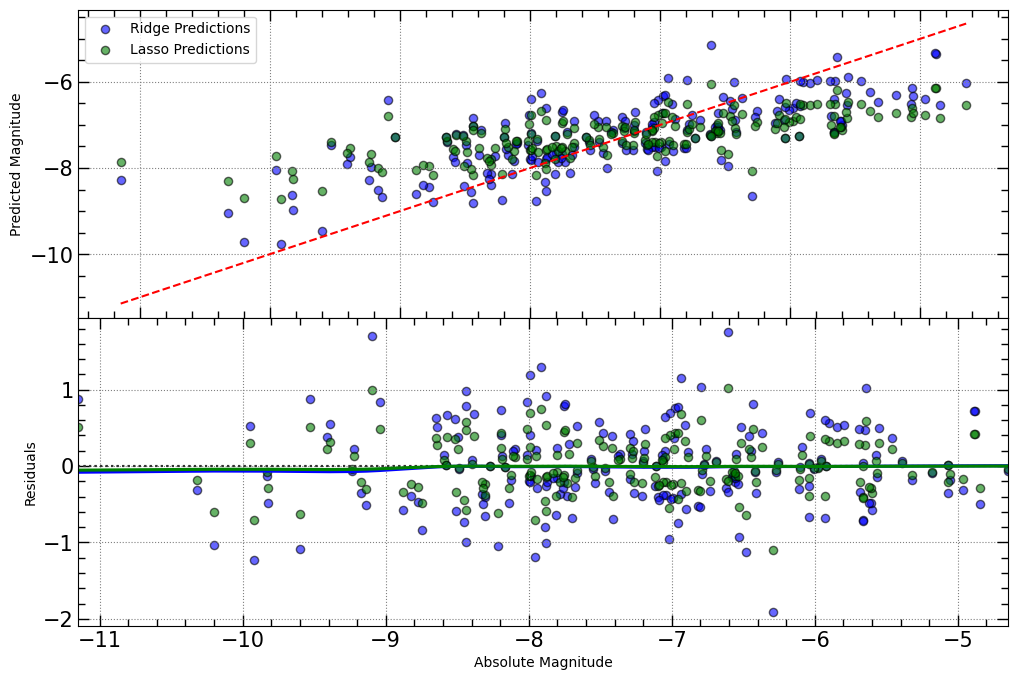

In [7]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_ridge, color = 'b', edgecolors = 'k', s = 35, alpha = 0.6, label = 'Ridge Predictions')
ax0.scatter(y_test, y_pred_lasso, color = 'g', edgecolors = 'k', s = 35, alpha = 0.6, label = 'Lasso Predictions')
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_ridge, lowess = True, color = 'b', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))
ax1 = sns.residplot(x = y_test, y = y_pred_lasso, lowess = True, color = 'g', 
                   scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

ax0.legend(loc = 'best')
sm_plot_mod(ax0)
sm_plot_mod(ax1)

---

## 3. Decision Tree & Random Forest

In [8]:
# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(random_state = 42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

In [9]:
# Evaluate Decision Tree Model
print("DECISION TREE REGRESSION")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_tree)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_tree)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_tree))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_tree)}")

# Evaluate Random Forest Model
print("\nRANDOM FOREST REGRESSION")
print(f"- Mean Absolute Error = {mean_absolute_error(y_test, y_pred_forest)}")
print(f"- Mean Squared Error = {mean_squared_error(y_test, y_pred_forest)}")
print(f"- Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test, y_pred_forest))}")
print(f"- R2 Score = {r2_score(y_test, y_pred_forest)}")

DECISION TREE REGRESSION
- Mean Absolute Error = 0.9052202813975975
- Mean Squared Error = 1.3324353403098677
- Root Mean Squared Error = 1.154311630500996
- R2 Score = 0.12365160516353546

RANDOM FOREST REGRESSION
- Mean Absolute Error = 0.7729168377113128
- Mean Squared Error = 0.9593204691147815
- Root Mean Squared Error = 0.9794490640736666
- R2 Score = 0.3690508441130117


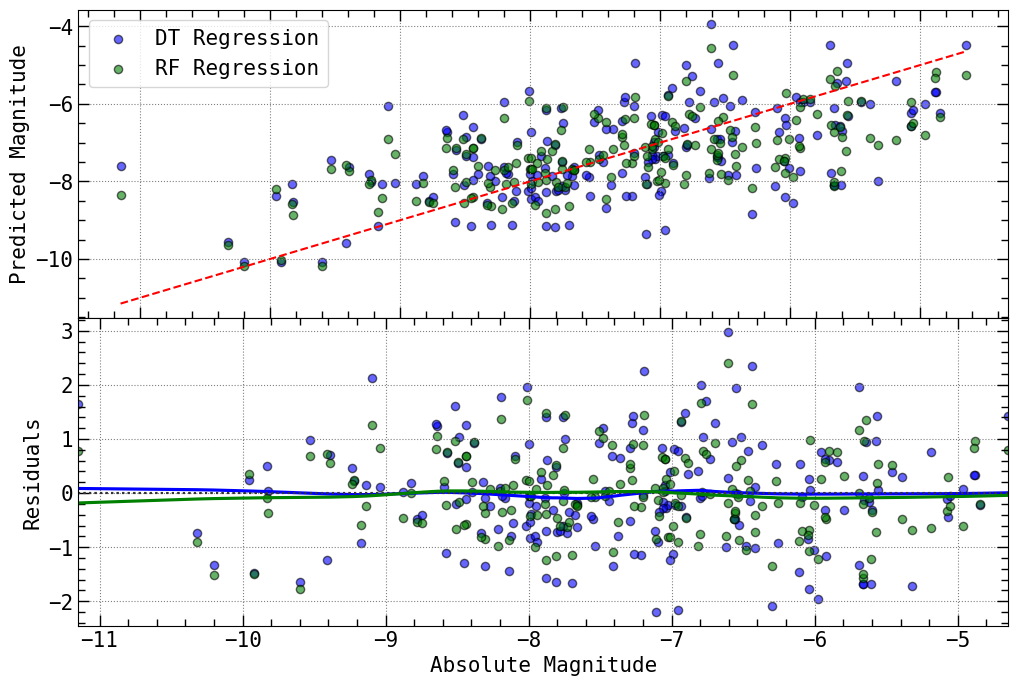

In [10]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_tree, color = 'b', edgecolors = 'k', s = 35, alpha = 0.6, label = 'DT Regression')
ax0.scatter(y_test, y_pred_forest, color = 'g', edgecolors = 'k', s = 35, alpha = 0.6, label = 'RF Regression')
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_tree, lowess = True, color = 'b', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))
ax1 = sns.residplot(x = y_test, y = y_pred_forest, lowess = True, color = 'g', 
                   scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

ax0.legend(loc = 'best')
sm_plot_mod(ax0)
sm_plot_mod(ax1)

---

## 4. Support Vector Regression (SVR)

In [12]:
# Standardize the data (SVR performs better with scaled data)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# SVR Model
svr_model = SVR(kernel = 'rbf', C = 1.0, epsilon = 0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate SVR Model
print("Support Vector Regression (SVR):")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_svr)}")
print(f"R2 Score: {r2_score(y_test, y_pred_svr)}")

Support Vector Regression (SVR):
Mean Squared Error: 0.7609925604886878
R2 Score: 0.49949195379967826


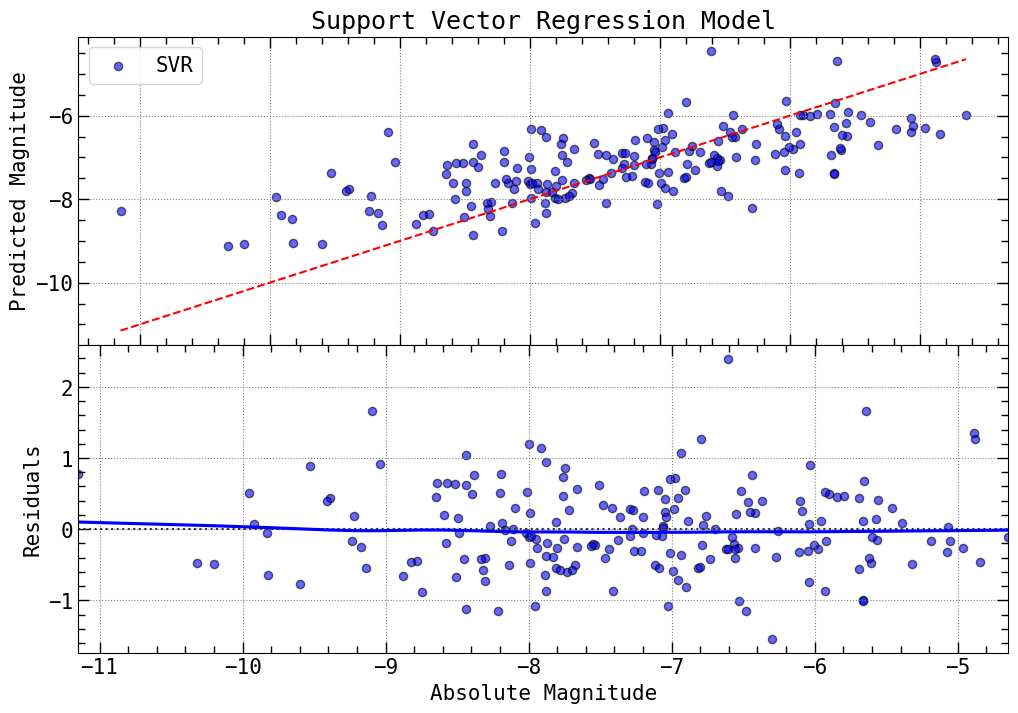

In [13]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_svr, color = 'b', edgecolors = 'k', s = 35, alpha = 0.6, label = 'SVR')
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_svr, lowess = True, color = 'b', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_title('Support Vector Regression Model')
ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

ax0.legend(loc = 'best')
sm_plot_mod(ax0)
sm_plot_mod(ax1)

---

## 5. Gradient Boosting Machines (GBM) / XBoost

In [14]:
# GBM Model
gbm_model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gbm_model.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate GBM Model
print("Gradient Boosting Machines (GBM):\n")
print(f"1) Mean Squared Error: {mean_squared_error(y_test, y_pred_gbm)}")
print(f"2) R2 Score: {r2_score(y_test, y_pred_gbm)}")

Gradient Boosting Machines (GBM):

1) Mean Squared Error: 0.8108722973481254
2) R2 Score: 0.46668583855399004


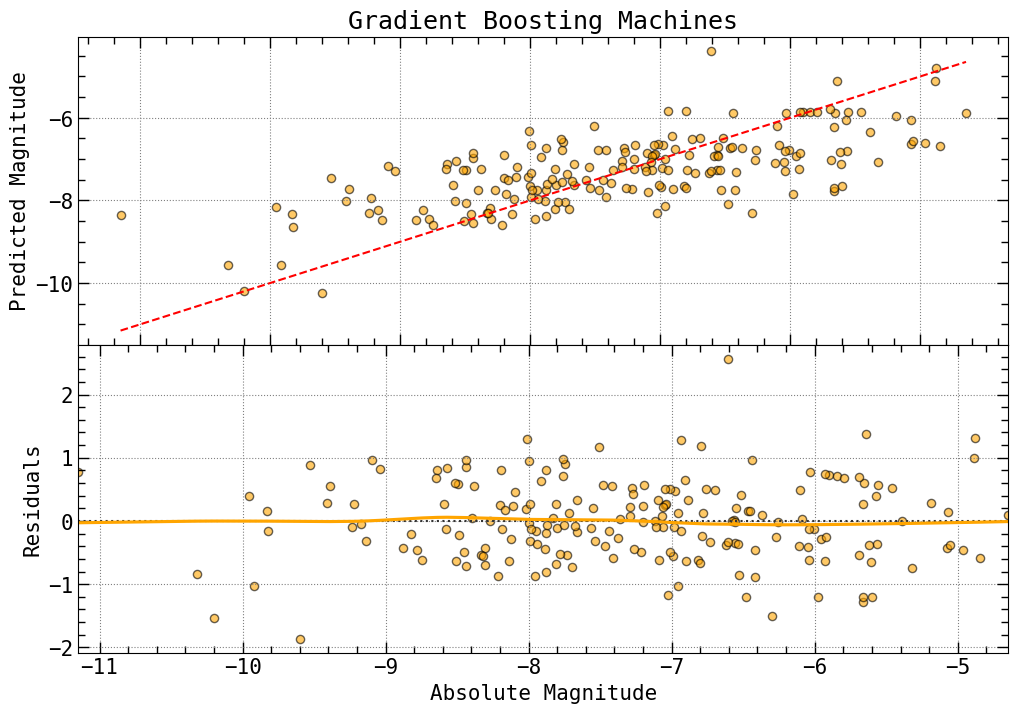

In [15]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_gbm, color = 'orange', edgecolors = 'k', s = 35, alpha = 0.6)
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_gbm, lowess = True, color = 'orange', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_title('Gradient Boosting Machines')
ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

sm_plot_mod(ax0)
sm_plot_mod(ax1)

---

## 6. Neural Networks

### 6.1 Feedforward Neural Network (FNN)

In [16]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Feedforward Neural Network (FNN) model
model = Sequential()
model.add(Dense(64, input_dim = 2, activation = 'relu'))  # First hidden layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(64, activation = 'relu'))  # Second hidden layer
model.add(Dense(1, activation = 'linear'))  # Output layer
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,417 (17.25 KB)

 Trainable params: 4,417 (17.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compiling the model
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mse')

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

# Training the model
history = model.fit(X_train_scaled, y_train, 
                    validation_data = (X_test_scaled, y_test),
                    epochs = 100, 
                    batch_size = 16, 
                    callbacks = [early_stopping],
                    verbose = 1)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 51.2263 - val_loss: 38.6860
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.0792 - val_loss: 16.8438
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.6004 - val_loss: 7.5128
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8063 - val_loss: 6.1931
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7925 - val_loss: 5.1532
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6918 - val_loss: 4.2723
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8444 - val_loss: 3.5679
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3184 - val_loss: 2.9434
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0044 - val_loss: 2.4494
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7730 - val_loss: 2.0676
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1144 - val_loss: 1.7538
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

In [18]:
# Evaluating the model
mse = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on the test set: {mse}")

# Making predictions
y_pred_fnn = model.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7493 
Mean Squared Error on the test set: 0.7176412343978882
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


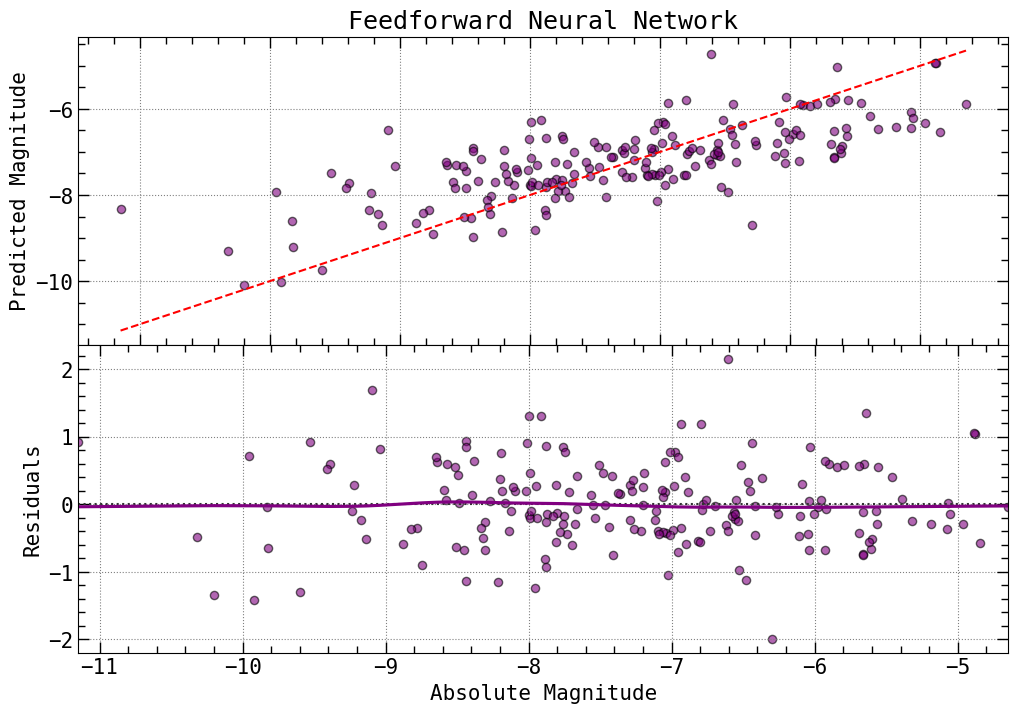

In [19]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_fnn, color = 'purple', edgecolors = 'k', s = 35, alpha = 0.6)
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_fnn, lowess = True, color = 'purple', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_title('Feedforward Neural Network')
ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

sm_plot_mod(ax0)
sm_plot_mod(ax1)

### 6.2 Convolutional Neural Networks (CNN)

In [43]:
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters = 64, kernel_size = 1, activation = 'relu', input_shape = input_shape, padding = 'same'))
    model.add(MaxPooling1D(pool_size=1))  # Pooling size must be adjusted to avoid reducing dimensions too quickly
    model.add(Conv1D(filters = 128, kernel_size = 1, activation = 'relu', padding = 'same'))
    model.add(MaxPooling1D(pool_size = 1))  # Same here
    model.add(Flatten())
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))  # Assuming binary classification or regression task
    model.compile(optimizer = 'adam', loss = 'mse')  # Choose the loss function according to your task
    
    return model

In [48]:
# Reshape the input data
if len(X_train.shape) == 2:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Create the CNN model with corrected input shape
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
cnn_model = build_cnn_model(input_shape)

# Train the model
cnn_model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test), verbose = 2)

# Evaluate the model on the test data
loss = cnn_model.evaluate(X_test, y_test, verbose = 0)
cnn_model.summary()

print('')
print(f'Test Loss: {loss}')

# Make Predictions
y_pred_cnn = cnn_model.predict(X_test)

Epoch 1/50
17/17 - 1s - 66ms/step - loss: 46.8991 - val_loss: 32.8618
Epoch 2/50
17/17 - 0s - 6ms/step - loss: 18.2007 - val_loss: 11.2575
Epoch 3/50
17/17 - 0s - 6ms/step - loss: 11.3786 - val_loss: 6.3376
Epoch 4/50
17/17 - 0s - 6ms/step - loss: 6.3474 - val_loss: 3.5025
Epoch 5/50
17/17 - 0s - 7ms/step - loss: 5.6233 - val_loss: 2.6259
Epoch 6/50
17/17 - 0s - 6ms/step - loss: 3.8534 - val_loss: 1.7662
Epoch 7/50
17/17 - 0s - 6ms/step - loss: 3.3392 - val_loss: 1.4218
Epoch 8/50
17/17 - 0s - 7ms/step - loss: 3.4312 - val_loss: 1.4540
Epoch 9/50
17/17 - 0s - 7ms/step - loss: 3.0075 - val_loss: 1.1527
Epoch 10/50
17/17 - 0s - 7ms/step - loss: 2.8152 - val_loss: 1.1187
Epoch 11/50
17/17 - 0s - 7ms/step - loss: 3.0186 - val_loss: 0.9878
Epoch 12/50
17/17 - 0s - 7ms/step - loss: 3.1979 - val_loss: 0.8931
Epoch 13/50
17/17 - 0s - 7ms/step - loss: 2.9524 - val_loss: 0.9629
Epoch 14/50
17/17 - 0s - 7ms/step - loss: 2.6276 - val_loss: 0.7893
Epoch 15/50
17/17 - 0s - 7ms/step - loss: 2.6486 - 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 4, 64)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 4, 128)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 4, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 50)                  │          25,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,449 (400.20 KB)

 Trainable params: 34,149 (133.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,300 (266.80 KB)


Test Loss: 0.811380922794342
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001BE3646D790> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


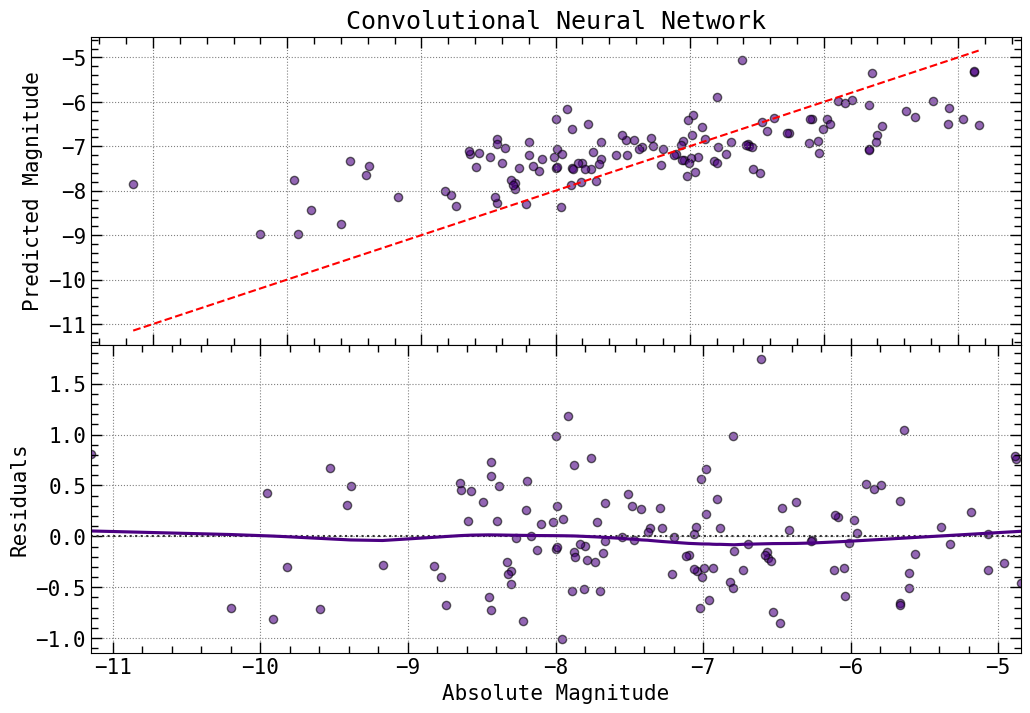

In [57]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_cnn, color = 'indigo', edgecolors = 'k', s = 35, alpha = 0.6)
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_cnn, lowess = True, color = 'indigo', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_title('Convolutional Neural Network')
ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

sm_plot_mod(ax0)
sm_plot_mod(ax1)

### 6.3 Artificial Neural Network (ANN)

In [53]:
# Reshape data to 2D (flattening) for scaling
X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])  # Flatten the last dimension
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])

# Scale the flattened data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Reshape back to the original 3D shape if needed for ANN input
X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

In [54]:
# Define the ANN model
def build_ann_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim = input_shape, activation = 'relu'))
    model.add(Dropout(0.2))  # Regularization to prevent overfitting
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'linear'))  # Adjust the output neuron and activation for regression tasks
    
    return model

In [59]:
# Compile the model
input_shape = X_train_scaled.shape[1]  # Adjust based on reshaped data
ann_model = build_ann_model(input_shape)
ann_model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs = 100, batch_size = 32, validation_data = (X_test_scaled, y_test), verbose = 2)

# SMake predictions
y_pred_ann = ann_model.predict(X_test_scaled)
ann_model.summary()

Epoch 1/100
17/17 - 2s - 100ms/step - loss: 47.9593 - mae: 6.7694 - val_loss: 39.5218 - val_mae: 6.0627
Epoch 2/100
17/17 - 0s - 8ms/step - loss: 33.9944 - mae: 5.5910 - val_loss: 25.3379 - val_mae: 4.6709
Epoch 3/100
17/17 - 0s - 7ms/step - loss: 21.7802 - mae: 4.3129 - val_loss: 14.9377 - val_mae: 3.4366
Epoch 4/100
17/17 - 0s - 7ms/step - loss: 13.4701 - mae: 3.1653 - val_loss: 10.1616 - val_mae: 2.7314
Epoch 5/100
17/17 - 0s - 7ms/step - loss: 9.9356 - mae: 2.6235 - val_loss: 8.9441 - val_mae: 2.5005
Epoch 6/100
17/17 - 0s - 6ms/step - loss: 9.1736 - mae: 2.4983 - val_loss: 7.8092 - val_mae: 2.3581
Epoch 7/100
17/17 - 0s - 7ms/step - loss: 7.3010 - mae: 2.2756 - val_loss: 6.7350 - val_mae: 2.1977
Epoch 8/100
17/17 - 0s - 7ms/step - loss: 6.0409 - mae: 2.0409 - val_loss: 6.2100 - val_mae: 2.0818
Epoch 9/100
17/17 - 0s - 6ms/step - loss: 5.9987 - mae: 1.9980 - val_loss: 5.4919 - val_mae: 1.9648
Epoch 10/100
17/17 - 0s - 6ms/step - loss: 5.0179 - mae: 1.8564 - val_loss: 5.1204 - val_m

17/17 - 0s - 6ms/step - loss: 1.4742 - mae: 0.9670 - val_loss: 0.8082 - val_mae: 0.7124
Epoch 83/100
17/17 - 0s - 6ms/step - loss: 1.2603 - mae: 0.8924 - val_loss: 0.7760 - val_mae: 0.6901
Epoch 84/100
17/17 - 0s - 6ms/step - loss: 1.3334 - mae: 0.9297 - val_loss: 0.7762 - val_mae: 0.6898
Epoch 85/100
17/17 - 0s - 6ms/step - loss: 1.3380 - mae: 0.9153 - val_loss: 0.7846 - val_mae: 0.6821
Epoch 86/100
17/17 - 0s - 7ms/step - loss: 1.2302 - mae: 0.8959 - val_loss: 0.7526 - val_mae: 0.6765
Epoch 87/100
17/17 - 0s - 6ms/step - loss: 1.1989 - mae: 0.8642 - val_loss: 0.7908 - val_mae: 0.6967
Epoch 88/100
17/17 - 0s - 8ms/step - loss: 1.2182 - mae: 0.8883 - val_loss: 0.7687 - val_mae: 0.6918
Epoch 89/100
17/17 - 0s - 7ms/step - loss: 1.3049 - mae: 0.8972 - val_loss: 0.7719 - val_mae: 0.6828
Epoch 90/100
17/17 - 0s - 7ms/step - loss: 1.3177 - mae: 0.9032 - val_loss: 0.7739 - val_mae: 0.6910
Epoch 91/100
17/17 - 0s - 7ms/step - loss: 1.2997 - mae: 0.9234 - val_loss: 0.7684 - val_mae: 0.6839
Epo

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,637 (53.27 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,092 (35.52 KB)

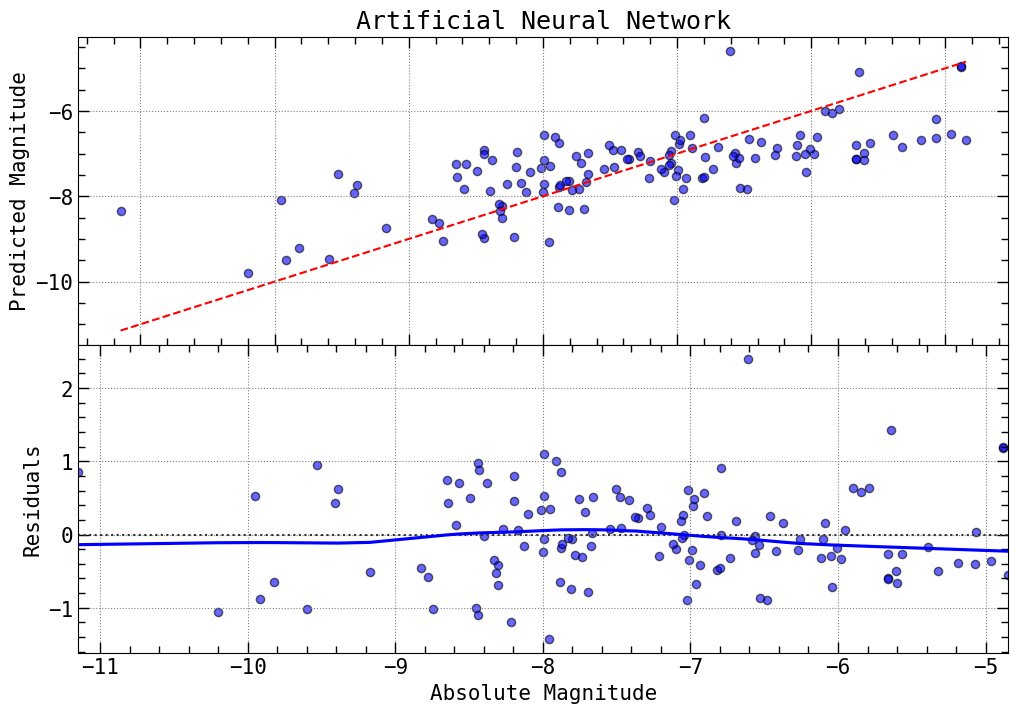

In [60]:
# Plotting
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace = 0)
spec = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax0 = fig.add_subplot(spec[0, 0])
ax1 = fig.add_subplot(spec[1, 0])

ax0.scatter(y_test, y_pred_ann, color = 'b', edgecolors = 'k', s = 35, alpha = 0.6)
ax0.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', ls = '--')

ax1 = sns.residplot(x = y_test, y = y_pred_ann, lowess = True, color = 'b', 
                    scatter_kws = dict(edgecolors = 'k', s = 35, alpha = 0.6))

ax0.set_title('Artificial Neural Network')
ax0.set_ylabel('Predicted Magnitude')
ax1.set_xlabel('Absolute Magnitude')
ax1.set_ylabel('Residuals')

sm_plot_mod(ax0)
sm_plot_mod(ax1)